# Map tissue expression

This notebook explores how you can explore whether the nodes in your network are expressed in a tissue of interest. The annotations are accessed from the Annotation object of Omnipath, and are based on expression data from the Human Protein Atlas.

In [1]:
%%time
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs._db.omnipath import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

/home/eirini/.cache/pypoetry/virtualenvs/neko-vv6LBICe-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


CPU times: user 5.47 s, sys: 506 ms, total: 5.98 s
Wall time: 6.17 s


## 1. Import genes as network nodes

In [2]:
genes = ["SRC", "NOTCH1", "FAK", "CDH1", "CDH2", "VIM", "MAP4K4", "LATS1", "LATS2", "PTK2B"]

In [3]:
new_net1 = Network(genes)

In [4]:
#Print node dataframe
new_net1.nodes

,Genesymbol,Uniprot,Type
0,SRC,P12931,NaN
1,NOTCH1,P46531,NaN
2,PTK2,Q05397,NaN
3,CDH1,P12830,NaN
4,CDH2,P19022,NaN
5,VIM,P08670,NaN
6,MAP4K4,O95819,NaN
7,LATS1,O95835,NaN
8,LATS2,Q9NRM7,NaN
9,PTK2B,Q14289,NaN


In [5]:
annot = Ontology()
results_df = annot.annotate_nodes(network = new_net1, resource = "HPA_tissue")

Available annotations:
entity_type
favourable
level
n_high
n_low
n_medium
n_not_detected
organ
pathology
prognostic
score
status
tissue


Enter one or more annotations you would like to include:  n_low, n_high


KeyError: 'n_low, n_high'

In [10]:
results_df.reset_index()

,index,uniprot,genesymbol,tissue
0,42434,P08670,VIM,neuropil
1,42435,P08670,VIM,cells in granular layer
2,42436,P08670,VIM,colorectal cancer
3,42437,P08670,VIM,goblet cells
4,42438,P08670,VIM,cells in red pulp
...,...,...,...,...
1227,1286371,P12931,SRC,smooth muscle cells
1228,1286372,P12931,SRC,germinal center cells
1229,1286373,P12931,SRC,peripheral nerve
1230,1286374,P12931,SRC,glandular cells


In [11]:
results_df.pivot_table(index=['uniprot', 'genesymbol'], columns='tissue', aggfunc=lambda x: 1, fill_value=0)


/tmp/ipykernel_107950/1754653350.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  results_df.pivot_table(index=['uniprot', 'genesymbol'], columns='tissue', aggfunc=lambda x: 1, fill_value=0)


,tissue,Bergmann glia - cytoplasm/membrane,Bergmann glia - nucleus,GLUC cells - cytoplasm/membrane,GLUC cells - nucleus,Langerhans,Leydig cells,Purkinje cells,Purkinje cells - cytoplasm/membrane,Purkinje cells - dendrites,Purkinje cells - nucleus,...,syncytiotrophoblasts - cell body,syncytiotrophoblasts - microvilli,testis cancer,thyroid cancer,trophoblastic cells,urothelial cancer,urothelial cells,vascular mural cells,white matter cells - cytoplasm/membrane,white matter cells - nucleus
uniprot,genesymbol,,,,,,,,,,,,,,,,,,,,,
O95819,MAP4K4,0,0,0,0,1,1,1,0,0,0,...,0,0,1,1,1,1,1,0,0,0
O95835,LATS1,0,0,0,0,1,1,1,0,0,0,...,0,0,1,1,1,1,1,0,0,0
P08670,VIM,0,0,0,0,0,1,1,0,0,0,...,1,1,1,1,0,1,1,1,0,0
P12830,CDH1,0,0,0,0,0,1,1,0,0,0,...,1,1,1,1,0,1,1,1,0,0
P12931,SRC,0,0,0,0,1,1,1,0,0,0,...,0,0,1,1,1,1,1,0,0,0
P19022,CDH2,1,1,1,1,1,1,0,1,1,1,...,0,0,1,1,1,1,1,0,1,1
P46531,NOTCH1,1,1,1,1,1,1,0,1,1,1,...,0,0,1,1,1,1,1,0,1,1
Q05397,PTK2,0,0,0,0,1,1,1,0,0,0,...,0,0,1,1,1,1,1,0,0,0
Q14289,PTK2B,0,0,0,0,1,1,1,0,0,0,...,0,0,1,1,1,1,1,0,0,0


## 2. Check if the genes are annotated in the tissue of interest (e.g., in colorectal cancer)

In [5]:
annot = Ontology()
results_df = annot.check_tissue_annotations(genes_df = new_net1.nodes, tissue = 'colorectal cancer')
print(results_df)

228kB [00:00, 14.2MB/s]
316kB [00:00, 16.3MB/s]
156kB [00:00, 44.1MB/s]
222kB [00:00, 52.6MB/s]
176kB [00:00, 47.4MB/s]
184kB [00:00, 40.4MB/s]
136kB [00:00, 48.8MB/s]
113kB [00:00, 41.6MB/s]
110kB [00:00, 44.9MB/s]
185kB [00:00, 96.9MB/s]

  Genesymbol  in_tissue
0        SRC       True
1     NOTCH1       True
2       PTK2       True
3       CDH1       True
4       CDH2       True
5        VIM       True
6     MAP4K4       True
7      LATS1       True
8      LATS2       True
9      PTK2B       True


## 3. Color nodes based on their presence/absence in the tissue of interest

The `tissue_mapping` functions highligts as light blue all the nodes of the network that are expressed in the used-defined system.

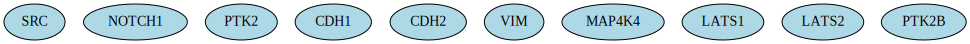

In [6]:
network_visualizer = NetworkVisualizer(new_net1)
network_visualizer.tissue_mapping(results_df)
network_visualizer.render()